In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-prediction-dataset/yield.csv
/kaggle/input/crop-yield-prediction-dataset/temp.csv
/kaggle/input/crop-yield-prediction-dataset/rainfall.csv
/kaggle/input/crop-yield-prediction-dataset/pesticides.csv
/kaggle/input/crop-yield-prediction-dataset/yield_df.csv


import all the librarires that we are going to utilize

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from tensorflow import keras

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

Read CSV file and display head

In [16]:
cropData = pd.read_csv('/kaggle/input/crop-yield-prediction-dataset/yield_df.csv')
print(cropData.head())

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


In [3]:
summary = cropData.describe()
print(summary)

         Unnamed: 0          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.000000   1990.000000      50.000000   
25%     7060.250000   1995.000000   19919.250000   
50%    14120.500000   2001.000000   38295.000000   
75%    21180.750000   2008.000000  104676.750000   
max    28241.000000   2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
mean                      1149.05598       37076.909344     20.542627  
std                        709.81215       59958.784665      6.312051  
min                         51.00000           0.040000      1.300000  
25%                        593.00000        1702.000000     16.702500  
50%                       1083.00000       17529.440000     21.510000  
75%                       1

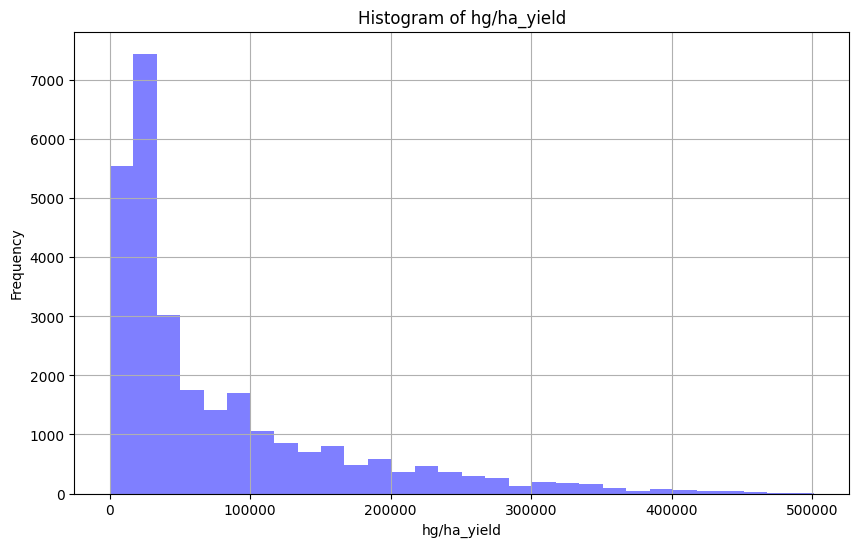

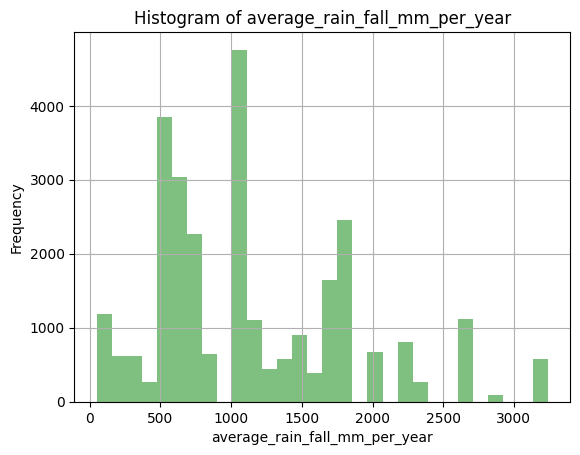

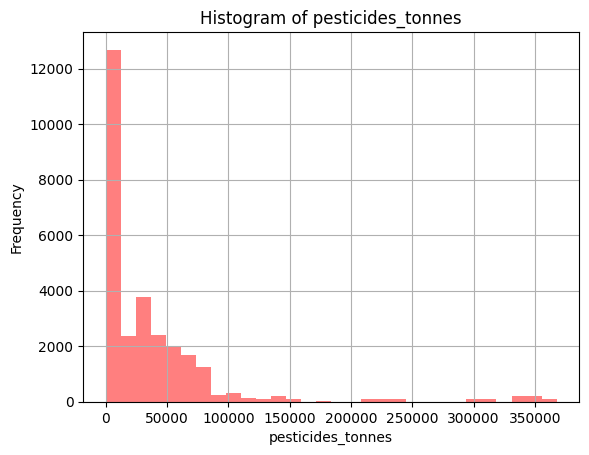

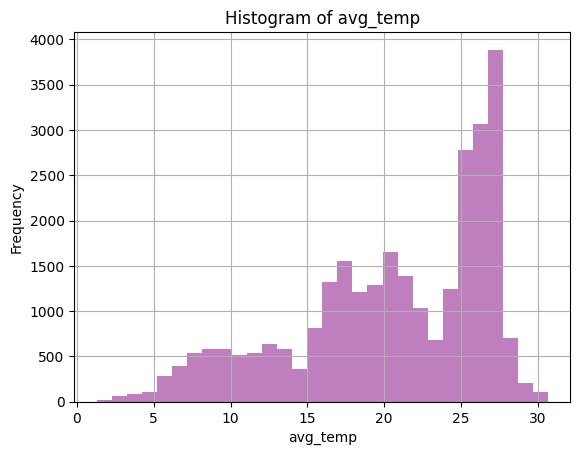

In [8]:
plt.figure(figsize=(10, 6))

# Histograms
cropData['hg/ha_yield'].hist(bins=30, alpha=0.5, color='blue')
plt.title('Histogram of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()



# for average rain fall per year
cropData['average_rain_fall_mm_per_year'].hist(bins=30, alpha=0.5, color='green')
plt.title('Histogram of average_rain_fall_mm_per_year')
plt.xlabel('average_rain_fall_mm_per_year')
plt.ylabel('Frequency')
plt.show()



# for perticides
cropData['pesticides_tonnes'].hist(bins=30, alpha=0.5, color='red')
plt.title('Histogram of pesticides_tonnes')
plt.xlabel('pesticides_tonnes')
plt.ylabel('Frequency')
plt.show()

# for average temperature
cropData['avg_temp'].hist(bins=30, alpha=0.5, color='purple')
plt.title('Histogram of avg_temp')
plt.xlabel('avg_temp')
plt.ylabel('Frequency')
plt.show()

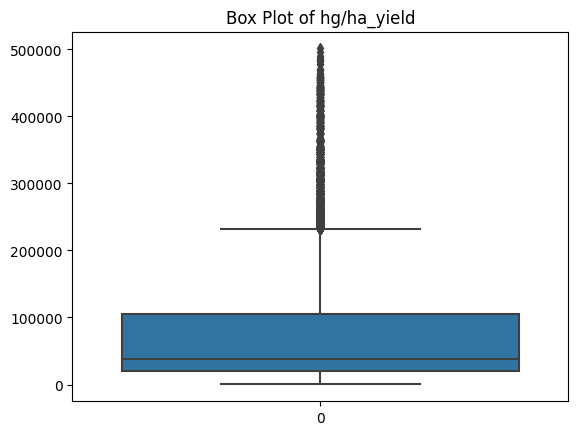

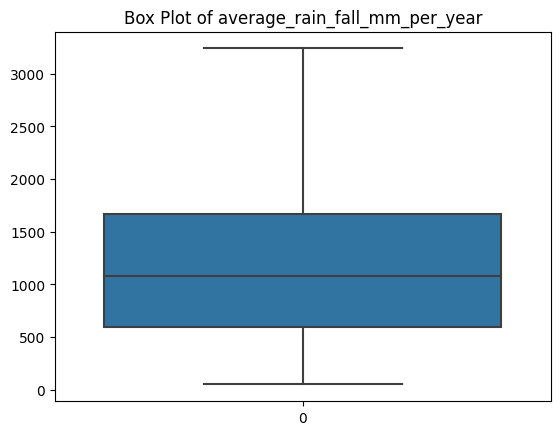

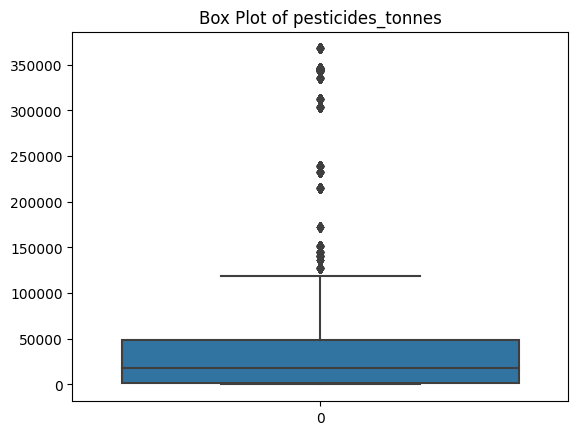

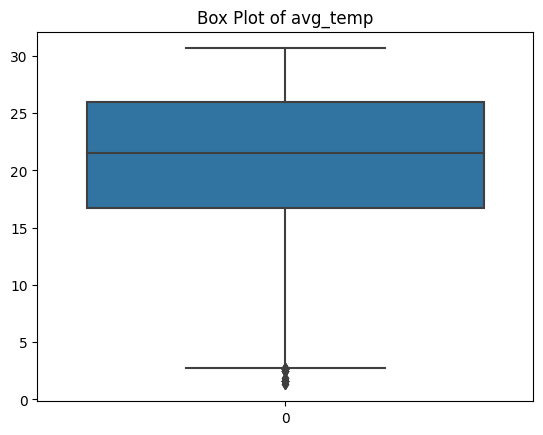

In [9]:
# Box Plots
sns.boxplot(data=cropData['hg/ha_yield'])
plt.title('Box Plot of hg/ha_yield')
plt.show()

sns.boxplot(data=cropData['average_rain_fall_mm_per_year'])
plt.title('Box Plot of average_rain_fall_mm_per_year')
plt.show()

sns.boxplot(data=cropData['pesticides_tonnes'])
plt.title('Box Plot of pesticides_tonnes')
plt.show()

sns.boxplot(data=cropData['avg_temp'])
plt.title('Box Plot of avg_temp')
plt.show()

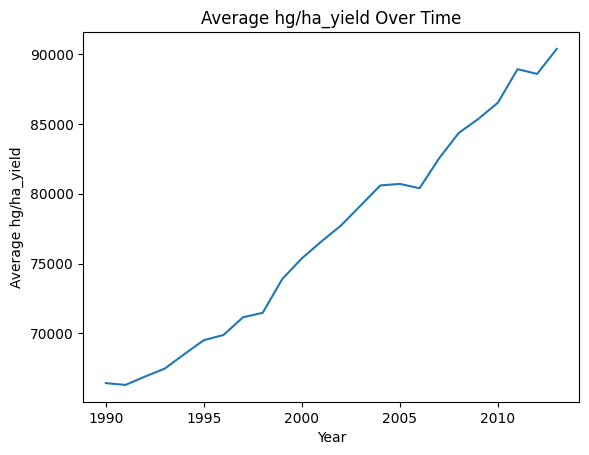

In [10]:
# Time Series Analysis
cropData.groupby('Year')['hg/ha_yield'].mean().plot()
plt.title('Average hg/ha_yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average hg/ha_yield')
plt.show()

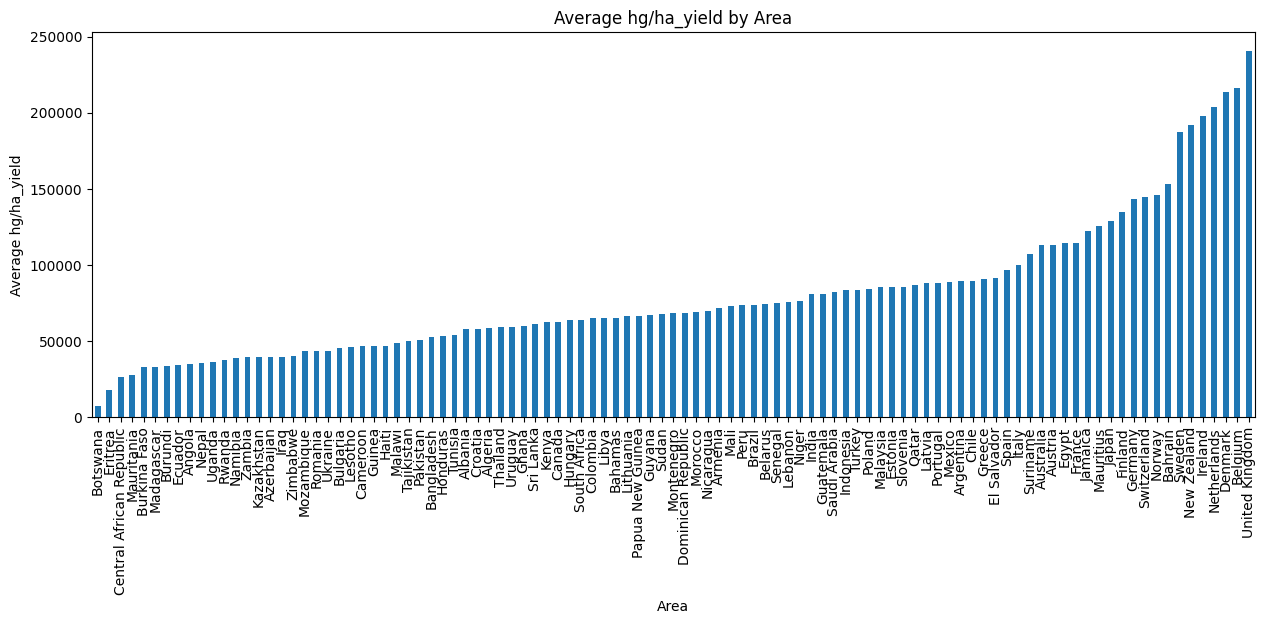

In [11]:
# Area
cropData.groupby('Area')['hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Average hg/ha_yield by Area')
plt.xlabel('Area')
plt.ylabel('Average hg/ha_yield')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


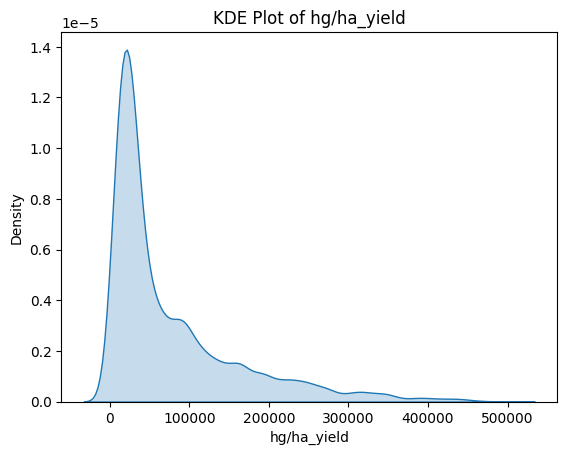

In [12]:
# Distribution Plots
cleaned_data = cropData['hg/ha_yield'].replace([np.inf, -np.inf], np.nan)
sns.kdeplot(cleaned_data, fill=True)
plt.title('KDE Plot of hg/ha_yield')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


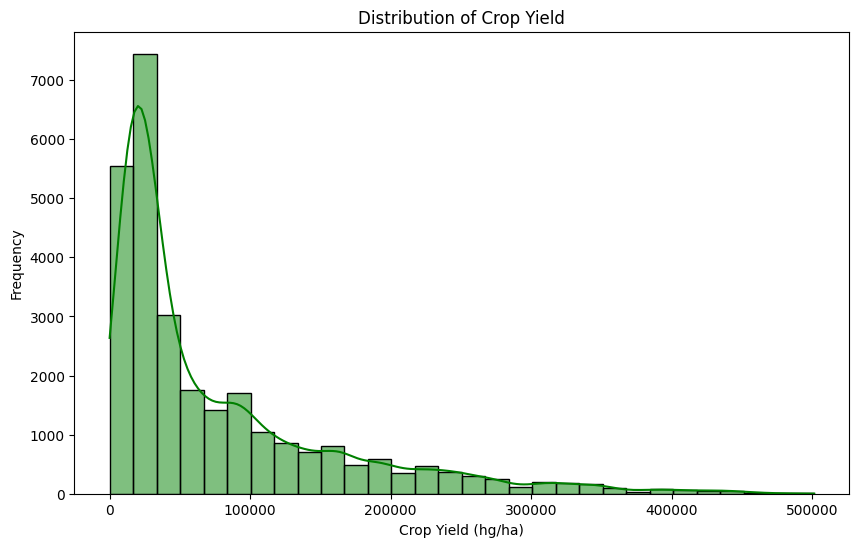

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(cropData['hg/ha_yield'], bins=30, kde=True, color='green')
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop Yield (hg/ha)')
plt.ylabel('Frequency')
plt.show()

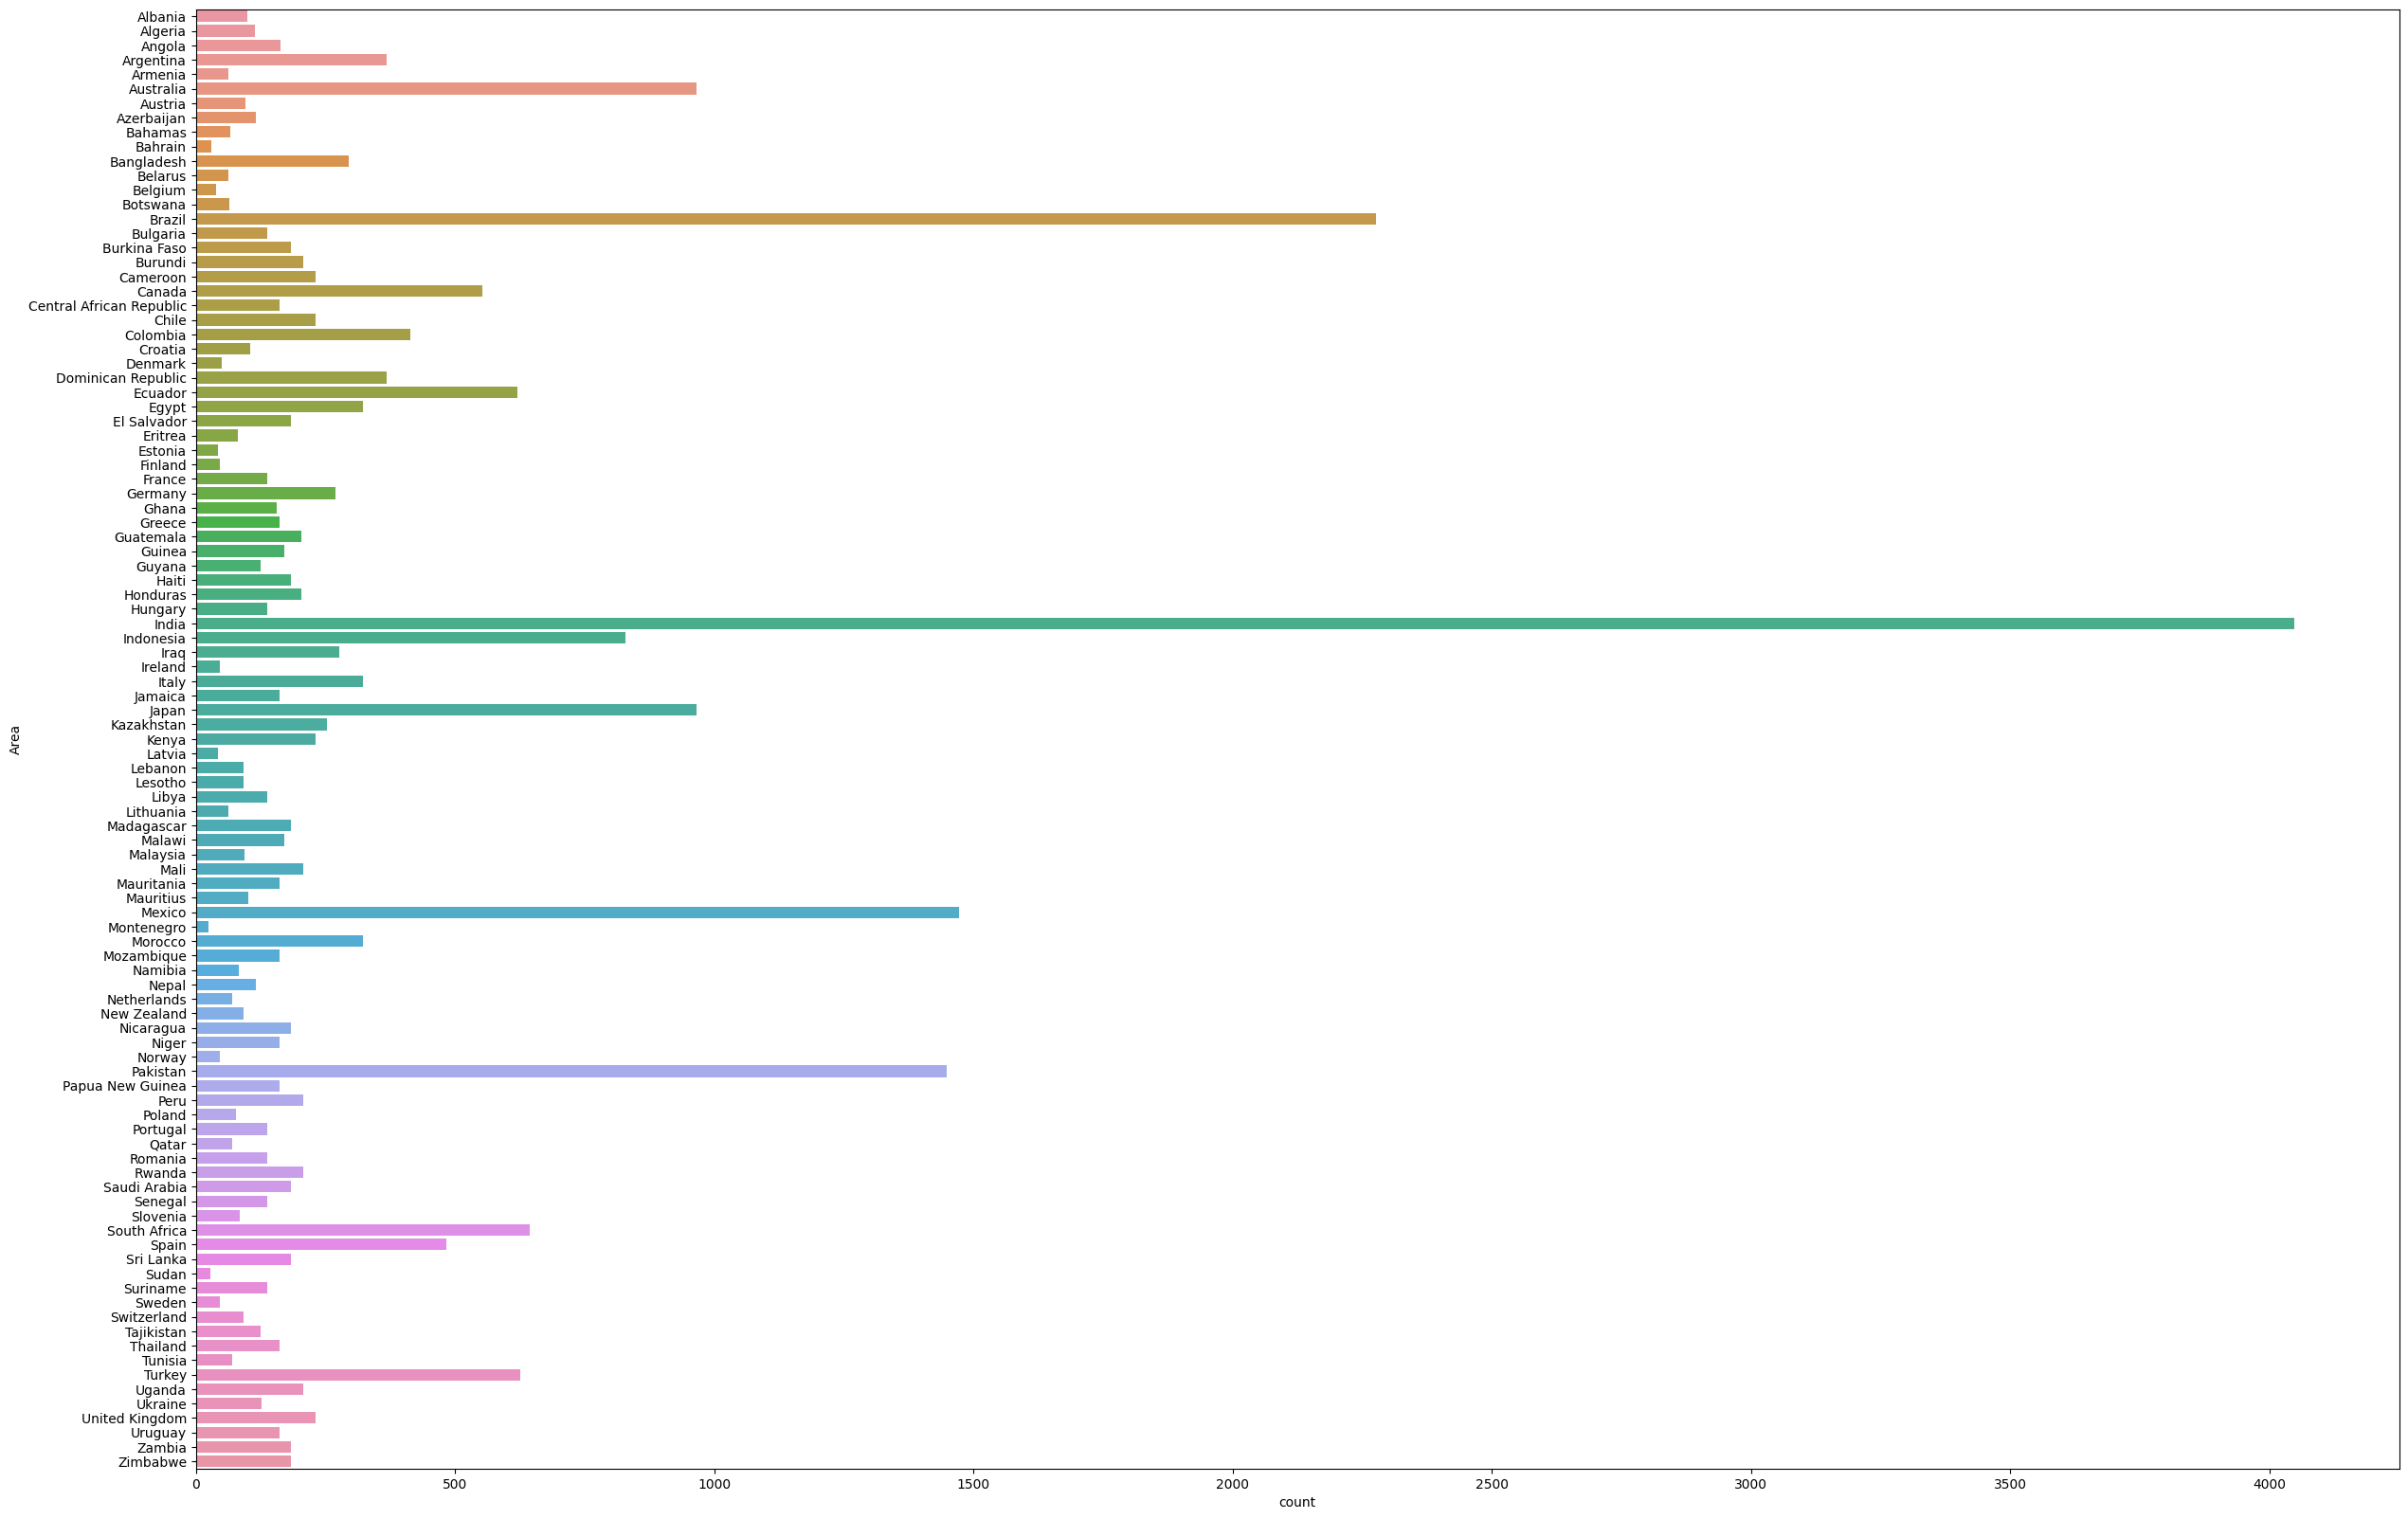

In [14]:
plt.figure(figsize = (30, 20))
sns.countplot(y="Area", data=cropData)
plt.show()

In [7]:
cropData.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [8]:
print (cropData.columns)

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')


Drop entire row that has a null value

In [6]:
cropData.dropna(axis=0)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


Data visualization

In [17]:
y = cropData['hg/ha_yield']
y.head()

0    36613
1    66667
2    23333
3    12500
4     7000
Name: hg/ha_yield, dtype: int64

In [12]:
# features = ['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
# X =  cropData[features]
# X.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37
3,Albania,Sorghum,1990,1485.0,121.0,16.37
4,Albania,Soybeans,1990,1485.0,121.0,16.37


In [18]:
features = ['Area', 'Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
X =  cropData[features]
X.head()

,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1485.0,121.0,16.37
1,Albania,Potatoes,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1485.0,121.0,16.37
3,Albania,Sorghum,1485.0,121.0,16.37
4,Albania,Soybeans,1485.0,121.0,16.37


In [9]:
print(X.shape)
print(y.shape)

(28242, 5)
(28242,)


In [19]:
le = LabelEncoder()
for col in ['Area', 'Item']:
    X.loc[:, col] = le.fit_transform(X[col])

X.head()

,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1485.0,121.0,16.37
1,0,3,1485.0,121.0,16.37
2,0,4,1485.0,121.0,16.37
3,0,5,1485.0,121.0,16.37
4,0,6,1485.0,121.0,16.37


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, shuffle=True)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [23]:
# models = {
#     "SVM": SVR(kernel = 'rbf'),
#     "RandomForest": RandomForestRegressor(random_state=42),
#     "LSTM": keras.Sequential([
#         keras.layers.Input(shape=(X_train_scaled.shape[1],)),
#         keras.layers.Reshape((X_train_scaled.shape[1], 1)),
#         keras.layers.LSTM(64, activation='relu'),
#         keras.layers.Dense(1)
#     ])
# }

In [24]:
# results = {}

In [25]:
score = cross_val_score(RandomForestRegressor(), X_train_scaled, y_train, cv = 5,  scoring="r2")
print (f"RandomForest Scores: {score}")
print(score.mean())

RandomForest Scores: [0.9729963  0.9689084  0.97422648 0.97449193 0.96828399]
0.971781418726564


Tuning Random Forest by changing the number of estimators to different values and observing the r2 score.

In [26]:
estimators = [50, 100, 150, 200, 250]
bestEstimator = 100
bestValueSoFar = 

for count in estimators:
    score = cross_val_score(RandomForestRegressor(n_estimators= count, random_state= 42), X_train_scaled, y_train, cv= 5, scoring="r2")
    print(f'For estimators: {count}: {score}')
    print(f'Score Mean: {score.mean()}')

For estimators: 50: [0.97310145 0.96681043 0.97349305 0.97423707 0.96655753]
Score Mean: 0.9708399062951056
For estimators: 100: [0.97315611 0.96790823 0.97433352 0.97438457 0.96756531]
Score Mean: 0.9714695480451436
For estimators: 150: [0.97320124 0.96826424 0.9744961  0.9745082  0.96748507]
Score Mean: 0.9715909690477978
For estimators: 200: [0.97308686 0.96858878 0.97448168 0.97444374 0.96777104]
Score Mean: 0.9716744216499518
For estimators: 250: [0.97327936 0.96848854 0.97452606 0.97448596 0.96782961]
Score Mean: 0.9717219055327556


In [ ]:
model = RandomForestRegressor(n_estimators=)

Tuning SVM

In [38]:
svm = SVR()
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)

In [39]:
grid.fit(X_train_scaled,y_train)

KeyboardInterrupt: 

In [ ]:
grid_svr = grid.predict(X_test_scaled)
print(r2_score(y_test, grid_svr))

Tuning LSTM

In [ ]:
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "SVM":, 
    "LSTM":,
}

In [33]:
# for this example we choose an estimator of 300
model = RandomForestRegressor(n_estimators= 300, random_state=42)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
print(r2_score(y_test, predictions))
# rmse, mse, ....


0.9360111000976868


In [2]:
for name, model in models.items():
    print(f"Training {name}...\n")
    predictions = []
    if name == 'LSTM':
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
        predictions = model.predict(X_test_scaled).flatten()
    else:
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)

    # Calculate Evaluations
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    residuals = y_test - predictions

    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R_score': r2, 'Residuals': residuals, 'Predictions': predictions}
    print(f" MSE: {mse}\n RMSE: {rmse}\n MAE: {mae}\n R-Squared: {r2}\n")

    # plot Actual vs Predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, ls='--')
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

NameError: name 'models' is not defined

Residuals for SVM:

25564     30657.807629
18113    -17999.056706
25607     12725.377351
6815     128192.184370
18144     18316.615479
             ...      
25027     -7802.956485
5508     101081.215675
11393    214037.795058
16688    -14614.071053
3877     -15412.974649
Name: hg/ha_yield, Length: 5649, dtype: float64




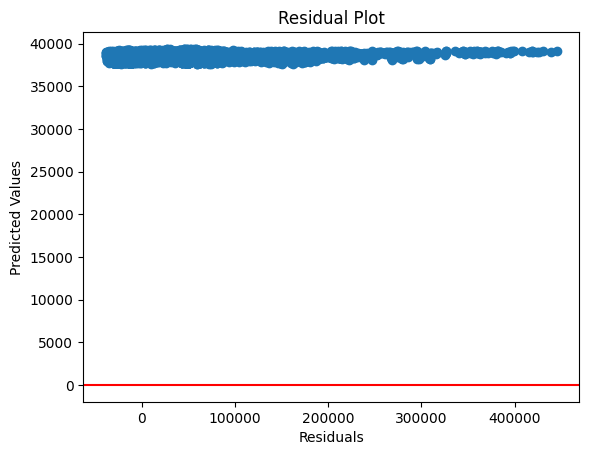

Residuals for RandomForest:

25564     -812.68
18113    -2161.80
25607     7462.96
6815      2372.76
18144    -4119.10
           ...   
25027     1211.47
5508     21032.31
11393     3074.18
16688    -1023.84
3877      6199.00
Name: hg/ha_yield, Length: 5649, dtype: float64




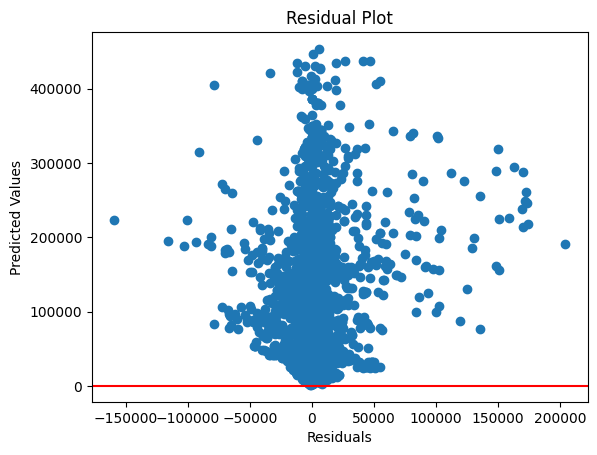

Residuals for LSTM:

25564    23695.308594
18113   -35724.640625
25607    33495.136719
6815     34989.187500
18144   -94219.953125
             ...     
25027   -10998.218750
5508     40432.648438
11393    76353.015625
16688     4479.332031
3877      2861.523438
Name: hg/ha_yield, Length: 5649, dtype: float64




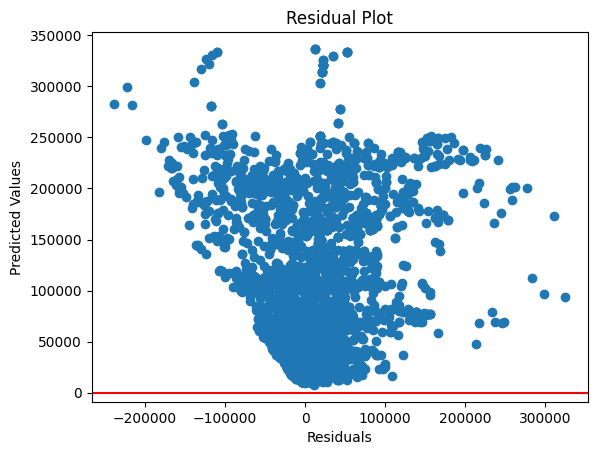

In [36]:
for name, model_results in results.items():
    print(f"Residuals for {name}:\n")
    print(model_results['Residuals'])
    print("\n")
    plt.scatter(model_results['Residuals'], model_results['Predictions'])
    plt.xlabel('Residuals')
    plt.ylabel('Predicted Values')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()

In [ ]:
plt.scatter()